In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

## Problem Statement

### Prepare a prediction model for profit of 50_startups data.

<ul>
<li>Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.</li>
<ul>

### Features

<ul>
<li>R&D Spend -- Research and devolop spend in the past few years</li>
<li>Administration -- spend on administration in the past few years</li>
<li>Marketing Spend -- spend on Marketing in the past few years</li>
<li>State -- states from which data is collected</li>
<li>Profit -- profit of each state in the past few years</li>
</ul>

## Importing dataset

In [2]:
df = pd.read_csv("05_02_50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print('Number of Rows {} Columns {}'.format(df.shape[0], df.shape[1]))

Number of Rows 50 Columns 5


## Descriptive Analysis

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Observation: There are no null Values in the dataset by reading counts from above.

## Checking for Data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Observation: all the data types are correct .
#### Note: State is a Categorical feature we need to do some encoding or convert it into numerical values by putting dummy values

## Renaming the columns name to make it short

In [6]:
df1=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
df1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Checking for missing values

In [7]:
df1.isnull().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

In [8]:
df1[df1.values==0.0]

,RDS,ADMS,MKTS,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


#### Observation: Notice there are some '0' values in the data in some features,
#### <ul><li>here the context for Zero should be absolute Zero, no money has spend regards to that Department</li></ul>

In [9]:
print('Zero Values in R&D Spend is',(df1['RDS'] == 0).sum(),'\n'
      'Zero Values in Administration is',(df1['ADMS'] == 0).sum(),'\n'
      'Zero Values in Marketing is',(df1['MKTS'] == 0).sum(),'\n'
      'Zero Values in Profit is',(df1['Profit'] == 0).sum())

Zero Values in R&D Spend is 2 
Zero Values in Administration is 0 
Zero Values in Marketing is 3 
Zero Values in Profit is 0


## Visualize Missing values

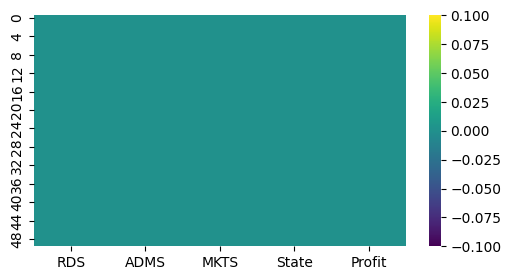

In [10]:
plt.figure(figsize=(6,3))
sns.heatmap(df1.isnull(),cmap='viridis')
plt.show()

#### Observation: No missing Values are present in the data set

## Checking for Duplicated Values

In [11]:
df1.duplicated().sum()

0

In [12]:
df1[df1.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [13]:
df1[df1.duplicated()].shape

(0, 5)

#### Observation: There are no duplicated values in the dataset

## Visualizing Continuous Datatype for Outlier Detection

In [14]:
continuous_feature=[feature for feature in df1.columns if df1[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


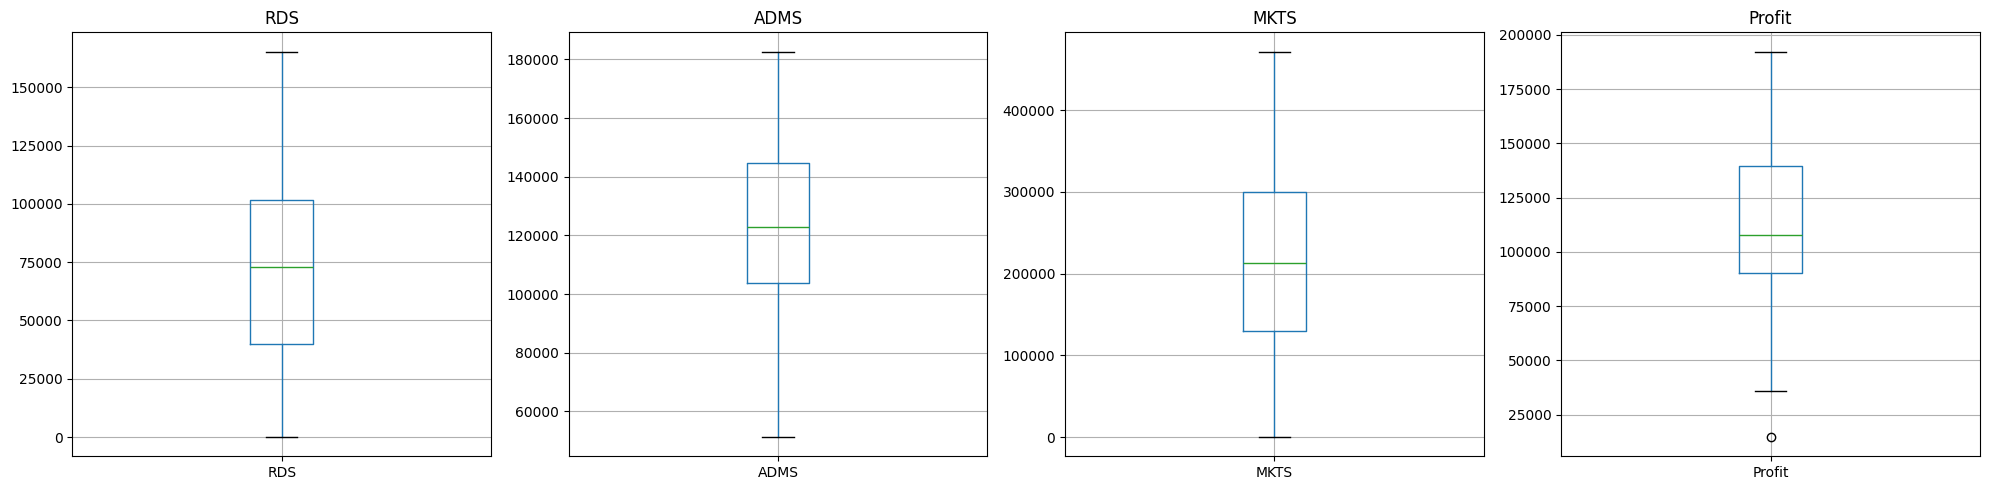

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create a 1x4 grid for subplots

for i, feature in enumerate(continuous_feature):
    data=df1.copy()  
    data.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Observation: There are Outlier in the Profit that is our Dependent Variable but there are no Outlier in our Dependent Features
<ul><li>Note: we need to handle Outlier the best way sometime is to remove outliers from the dataset to stop them skewing or screwing our analysis, but that will lead to loss of information as we have a smaller dataset</li></ul>

## Let's try to find the Outliers in the Profit Dependent Variable
<ul><li>Note: Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by the extreme values</li></ul>

In [16]:
stats = df1['Profit'].describe()[["50%","25%","75%"]]
stats['IQR'] = stats["75%"] - stats["25%"]
stats['Upper_Bound'] = stats["75%"] + 1.5*stats['IQR']
stats['Lower_Bound'] = stats["25%"] - 1.5*stats['IQR']
stats

50%            107978.1900
25%             90138.9025
75%            139765.9775
IQR             49627.0750
Upper_Bound    214206.5900
Lower_Bound     15698.2900
Name: Profit, dtype: float64

In [17]:
outliers_mask = (df1['Profit'] <= stats['Lower_Bound']) | (df1['Profit'] >= stats['Upper_Bound'])

outliers = df1.loc[outliers_mask, 'Profit']

outliers

49    14681.4
Name: Profit, dtype: float64

## Transform Dataset

https://www.statology.org/transform-data-in-python/

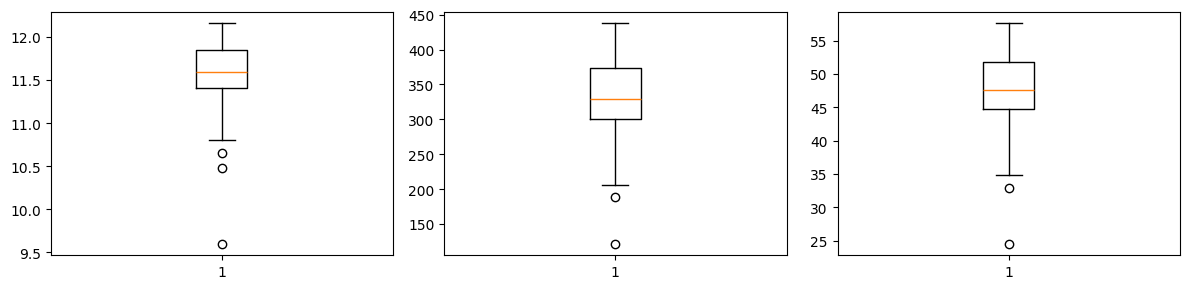

In [18]:
plt.subplots(1,3,figsize = (12,3))
plt.subplot(131)
plt.boxplot(np.log(df1['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df1['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df1['Profit']))
plt.tight_layout()
plt.show()

#### Observation: Even After Transformation we cannot get rid of the outlier

## Build Model without removing outliers

In [19]:
model = smf.ols("Profit~RDS+ADMS+MKTS", data = df1)
raw_model = model.fit()

In [20]:
raw_model.rsquared , raw_model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

## Let's try Median Imputation to handle Outlier in Profit

In [21]:
df2 = df1.copy()

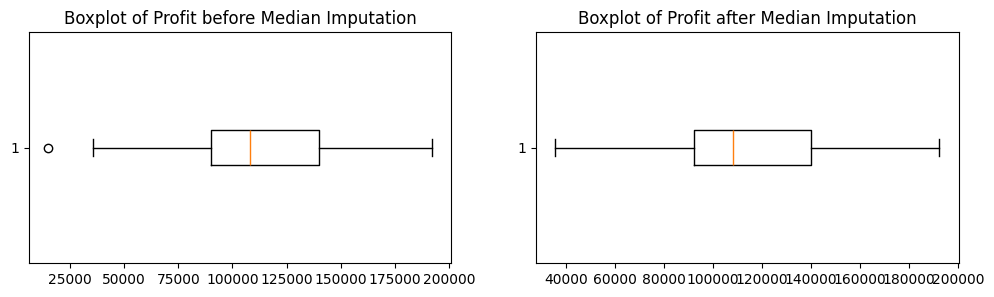

In [22]:
median = df2['Profit'].median()

outliers_before_imputation = df2.loc[outliers_mask, 'Profit']
plt.subplots(1,2,figsize = (12,3))
plt.subplot(121)
plt.boxplot(df2['Profit'], vert=False)
plt.title("Boxplot of Profit before Median Imputation")

# Impute outliers with median
df2.loc[outliers_mask, 'Profit'] = median

outliers_after_imputation = df2.loc[outliers_mask, 'Profit']
plt.subplot(122)
plt.boxplot(df2['Profit'],vert=False)
plt.title("Boxplot of Profit after Median Imputation")
plt.show()

## Let's test our data in model and compare the R-squared with Median imputation data model

In [23]:
model = smf.ols("Profit~RDS+ADMS+MKTS", data = df2)
after_median_imputation_model = model.fit()
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.9182958360807372, 0.91296730365122)

#### Observation: As you can see after median imputation the model is not performing well.

## Let's try Mean Imputation to handle Outlier in Profit

In [24]:
df3 = df1.copy()

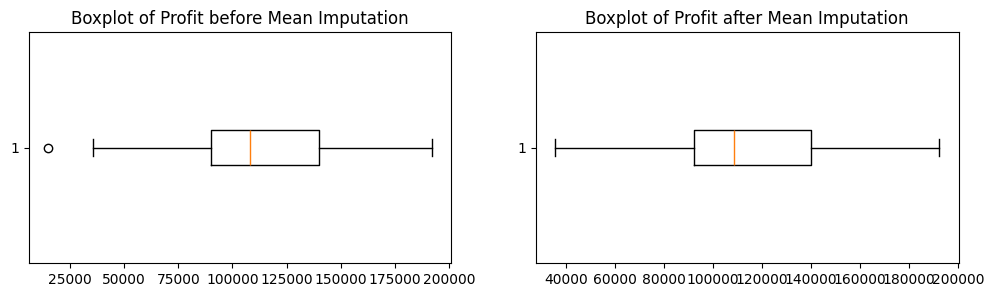

In [25]:
mean = df3['Profit'].mean()

outliers_before_imputation = df3.loc[outliers_mask, 'Profit']
plt.subplots(1,2,figsize = (12,3))
plt.subplot(121)
plt.boxplot(df3['Profit'], vert=False)
plt.title("Boxplot of Profit before Mean Imputation")

# Impute outliers with mean
df3.loc[outliers_mask, 'Profit'] = mean

outliers_after_imputation = df3.loc[outliers_mask, 'Profit']
plt.subplot(122)
plt.boxplot(df3['Profit'],vert=False)
plt.title("Boxplot of Profit after Mean Imputation")
plt.show()

In [26]:
model = smf.ols("Profit~RDS+ADMS+MKTS", data = df3)
after_mean_imputation_model = model.fit()
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.9119537155310937, 0.9062115665439912)

#### Observation: As you can see after mean imputation the model is not performing well & it got a little worse than the median one 0.9119 < 0.9182.

## Now to remove the outlier and fit the model

In [27]:
df4 = df1.copy()
df4.shape

(50, 5)

In [28]:
df4 = df4[~outliers_mask]
df4.shape

(49, 5)

In [29]:
model = smf.ols("Profit~RDS+ADMS+MKTS", data = df4)
# model = smf.ols("Profit~RDS+MKTS", data = df4) passed cook's distance.
removed_outlier_model = model.fit()
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

#### Observation: A Slightly better score than the raw data model 96.13%
<ul><li>Note: We will continue with this data set df4.</li></ul>

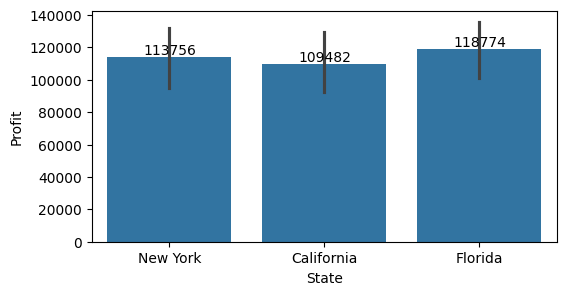

In [30]:
plt.figure(figsize=(6,3))
ax = sns.barplot(x = "State", y = 'Profit', data = df4)
for i in ax.containers:
    ax.bar_label(i,)

#### Observation:There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation
<ul><li>Note: We are going to drop this feature while building model as it is an irrelevant feature for our inferences</li></ul>

## Correlation Analysis

In [31]:
df4.columns

Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

In [32]:
df5 = df4.drop('State', axis=1)
df5.columns

Index(['RDS', 'ADMS', 'MKTS', 'Profit'], dtype='object')

In [33]:
df5.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.243438,0.711654,0.978437
ADMS,0.243438,1.000000,-0.037280,0.205841
MKTS,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


#### Observation: R&D has the highest score of correlation with Profit

## Detecting Influencers/Outliers in the Model

In [34]:
influence_points=removed_outlier_model.get_influence()
c, p_value=influence_points.cooks_distance

#### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [35]:
k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
#print('Cut-off line at',np.round(leverage_cutoff,2)) 0.37

#### Let's plot the influencers and also plot a cut off line using the stem plot

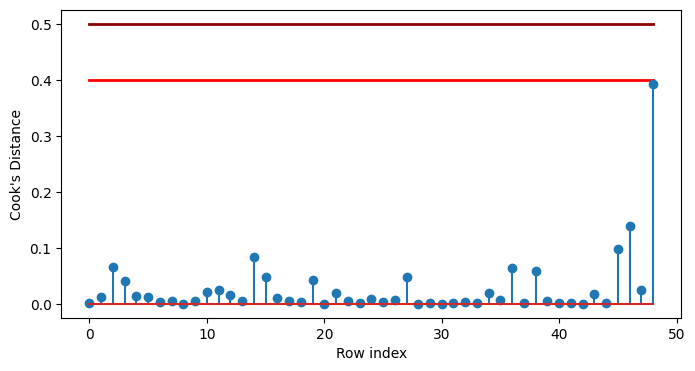

In [36]:
fig = plt.figure(figsize = (8,4))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.4,0.4]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

#### Observation: All the points are below our cut-off line
<ul><li>Hence, we can say that there are no influncers present in our model we can proceed with the predictions</li></ul>

## Model Predictions

In [37]:
df4.columns

Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

In [38]:
predicted = pd.DataFrame()
predicted['RDS'] = df4.RDS
predicted['ADMS'] = df4.ADMS
predicted['MKTS'] = df4.MKTS
predicted['Profit'] = df4.Profit
predicted['Predicted_Profit'] = pd.DataFrame(removed_outlier_model.predict(predicted[['RDS','ADMS','MKTS']]))
predicted.head()

,RDS,ADMS,MKTS,Profit,Predicted_Profit
0,165349.20,136897.80,471784.10,192261.83,190716.676999
1,162597.70,151377.59,443898.53,191792.06,187537.122227
2,153441.51,101145.55,407934.54,191050.39,180575.526396
3,144372.41,118671.85,383199.62,182901.99,172461.144642
4,142107.34,91391.77,366168.42,166187.94,170863.486721


## Table containing metrics for each prepared model

In [39]:
vals = dict()

models = [raw_model, after_median_imputation_model, after_mean_imputation_model, removed_outlier_model]
rsquared_values, rsquared_adj_values, rmse_values = [], [], []

for x in models:
    rsquared_values.append(x.rsquared)
    rsquared_adj_values.append(x.rsquared_adj)
    rmse_values.append(np.sqrt(x.mse_resid))

vals['rsquared'] = rsquared_values
vals['rsquared_adj'] = rsquared_adj_values
vals['RMSE'] = rmse_values

indexes = ['raw_model', 'after_median_imputation_model', 'after_mean_imputation_model', 'removed_outlier_model']
model_metrics = pd.DataFrame(data = vals, index = indexes)
model_metrics

,rsquared,rsquared_adj,RMSE
raw_model,0.950746,0.947534,9232.334837
after_median_imputation_model,0.918296,0.912967,11148.345424
after_mean_imputation_model,0.911954,0.906212,11570.325358
removed_outlier_model,0.961316,0.958737,7753.807752


## Visualize Model Performance

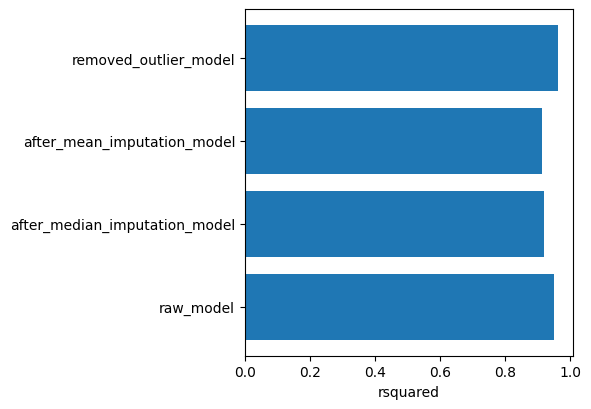

In [40]:
plt.figure(figsize=(6,4))
plt.barh(y=model_metrics.index, width = model_metrics.rsquared, height=0.8)
plt.tight_layout()
plt.xlabel(xlabel='rsquared')
plt.show()